### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

### Loading the dataset

In [2]:
df = pd.read_csv(r"C:\Users\bhumu\Downloads\Human_age_prediction_synthetic_dataset\Train.csv")

In [3]:
df

,Gender,Height (cm),Weight (kg),Blood Pressure (s/d),Cholesterol Level (mg/dL),BMI,Blood Glucose Level (mg/dL),Bone Density (g/cm²),Vision Sharpness,Hearing Ability (dB),...,Family History,Cognitive Function,Mental Health Status,Sleep Patterns,Stress Levels,Pollution Exposure,Sun Exposure,Education Level,Income Level,Age (years)
0,Male,171.148359,86.185197,151/109,259.465814,29.423017,157.652848,0.132868,0.200000,58.786198,...,None,44.059172,Good,Insomnia,2.797064,5.142344,7.108975,None,Medium,89
1,Male,172.946206,79.641937,134/112,263.630292,26.626847,118.507805,0.629534,0.267312,54.635270,...,Heart Disease,45.312298,Good,Normal,9.339930,7.272720,3.918489,Undergraduate,Medium,77
2,Female,155.945488,49.167058,160/101,207.846206,20.217553,143.587550,0.473487,0.248667,54.564632,...,Hypertension,56.246991,Poor,Insomnia,9.234637,8.500386,5.393408,None,Medium,70
3,Female,169.078298,56.017921,133/94,253.283779,19.595270,137.448581,1.184315,0.513818,79.722963,...,Hypertension,55.196092,Poor,Insomnia,4.693446,7.555511,2.745578,None,Low,52
4,Female,163.758355,73.966304,170/106,236.119899,27.582078,145.328695,0.434562,0.306864,52.479469,...,None,53.023379,Good,Normal,4.038537,9.429097,3.878435,Undergraduate,High,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,Male,161.632502,88.323405,134/91,204.175510,33.807917,112.075747,1.583006,0.665907,27.997736,...,Diabetes,57.820282,Fair,Normal,8.091897,9.846088,9.111205,Undergraduate,High,22
2996,Male,163.443512,93.217007,110/78,197.384424,34.894725,101.177692,1.785129,0.720304,32.866623,...,Heart Disease,68.783715,Good,Normal,2.427081,1.141303,8.578184,Undergraduate,Medium,19
2997,Male,177.857644,86.258847,159/116,238.641542,27.268332,110.548146,0.366012,0.200000,39.756270,...,None,50.133807,Fair,Normal,7.671837,5.101134,2.199199,Undergraduate,Low,85
2998,Female,162.287164,41.371018,134/82,198.244328,15.708252,123.704379,1.452963,0.648158,43.338594,...,Hypertension,68.864629,Good,Insomnia,7.920076,4.452130,5.051613,None,High,30


### Data Preprocessing

In [4]:
df.shape

(3000, 26)

In [5]:
df.isna().sum()

Gender                         0
Height (cm)                    0
Weight (kg)                    0
Blood Pressure (s/d)           0
Cholesterol Level (mg/dL)      0
BMI                            0
Blood Glucose Level (mg/dL)    0
Bone Density (g/cm²)           0
Vision Sharpness               0
Hearing Ability (dB)           0
Physical Activity Level        0
Smoking Status                 0
Alcohol Consumption            0
Diet                           0
Chronic Diseases               0
Medication Use                 0
Family History                 0
Cognitive Function             0
Mental Health Status           0
Sleep Patterns                 0
Stress Levels                  0
Pollution Exposure             0
Sun Exposure                   0
Education Level                0
Income Level                   0
Age (years)                    0
dtype: int64

In [6]:
df.dtypes

Gender                          object
Height (cm)                    float64
Weight (kg)                    float64
Blood Pressure (s/d)            object
Cholesterol Level (mg/dL)      float64
BMI                            float64
Blood Glucose Level (mg/dL)    float64
Bone Density (g/cm²)           float64
Vision Sharpness               float64
Hearing Ability (dB)           float64
Physical Activity Level         object
Smoking Status                  object
Alcohol Consumption             object
Diet                            object
Chronic Diseases                object
Medication Use                  object
Family History                  object
Cognitive Function             float64
Mental Health Status            object
Sleep Patterns                  object
Stress Levels                  float64
Pollution Exposure             float64
Sun Exposure                   float64
Education Level                 object
Income Level                    object
Age (years)              

In [7]:
df[['Systolic', 'Diastolic']] = df['Blood Pressure (s/d)'].str.split('/', expand=True).astype(int)

In [8]:
df

,Gender,Height (cm),Weight (kg),Blood Pressure (s/d),Cholesterol Level (mg/dL),BMI,Blood Glucose Level (mg/dL),Bone Density (g/cm²),Vision Sharpness,Hearing Ability (dB),...,Mental Health Status,Sleep Patterns,Stress Levels,Pollution Exposure,Sun Exposure,Education Level,Income Level,Age (years),Systolic,Diastolic
0,Male,171.148359,86.185197,151/109,259.465814,29.423017,157.652848,0.132868,0.200000,58.786198,...,Good,Insomnia,2.797064,5.142344,7.108975,None,Medium,89,151,109
1,Male,172.946206,79.641937,134/112,263.630292,26.626847,118.507805,0.629534,0.267312,54.635270,...,Good,Normal,9.339930,7.272720,3.918489,Undergraduate,Medium,77,134,112
2,Female,155.945488,49.167058,160/101,207.846206,20.217553,143.587550,0.473487,0.248667,54.564632,...,Poor,Insomnia,9.234637,8.500386,5.393408,None,Medium,70,160,101
3,Female,169.078298,56.017921,133/94,253.283779,19.595270,137.448581,1.184315,0.513818,79.722963,...,Poor,Insomnia,4.693446,7.555511,2.745578,None,Low,52,133,94
4,Female,163.758355,73.966304,170/106,236.119899,27.582078,145.328695,0.434562,0.306864,52.479469,...,Good,Normal,4.038537,9.429097,3.878435,Undergraduate,High,79,170,106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,Male,161.632502,88.323405,134/91,204.175510,33.807917,112.075747,1.583006,0.665907,27.997736,...,Fair,Normal,8.091897,9.846088,9.111205,Undergraduate,High,22,134,91
2996,Male,163.443512,93.217007,110/78,197.384424,34.894725,101.177692,1.785129,0.720304,32.866623,...,Good,Normal,2.427081,1.141303,8.578184,Undergraduate,Medium,19,110,78
2997,Male,177.857644,86.258847,159/116,238.641542,27.268332,110.548146,0.366012,0.200000,39.756270,...,Fair,Normal,7.671837,5.101134,2.199199,Undergraduate,Low,85,159,116
2998,Female,162.287164,41.371018,134/82,198.244328,15.708252,123.704379,1.452963,0.648158,43.338594,...,Good,Insomnia,7.920076,4.452130,5.051613,None,High,30,134,82


In [9]:
def categorize_bp(row):
    if row['Systolic'] < 120 and row['Diastolic'] < 80:
        return 'Normal'
    elif 120 <= row['Systolic'] < 129 and row['Diastolic'] < 80:
        return 'Elevated'
    elif 130 <= row['Systolic'] < 139 or 80 <= row['Diastolic'] < 89:
        return 'Hypertension-1'
    elif row['Systolic'] >= 140 or row['Diastolic'] >= 90:
        return 'Hypertension-2'
    elif row['Systolic'] > 180 or row['Diastolic'] > 120:
        return 'Hypertensive Crisis'
        
df['BP_Category'] = df.apply(categorize_bp, axis=1)

In [10]:
df

,Gender,Height (cm),Weight (kg),Blood Pressure (s/d),Cholesterol Level (mg/dL),BMI,Blood Glucose Level (mg/dL),Bone Density (g/cm²),Vision Sharpness,Hearing Ability (dB),...,Sleep Patterns,Stress Levels,Pollution Exposure,Sun Exposure,Education Level,Income Level,Age (years),Systolic,Diastolic,BP_Category
0,Male,171.148359,86.185197,151/109,259.465814,29.423017,157.652848,0.132868,0.200000,58.786198,...,Insomnia,2.797064,5.142344,7.108975,None,Medium,89,151,109,Hypertension-2
1,Male,172.946206,79.641937,134/112,263.630292,26.626847,118.507805,0.629534,0.267312,54.635270,...,Normal,9.339930,7.272720,3.918489,Undergraduate,Medium,77,134,112,Hypertension-1
2,Female,155.945488,49.167058,160/101,207.846206,20.217553,143.587550,0.473487,0.248667,54.564632,...,Insomnia,9.234637,8.500386,5.393408,None,Medium,70,160,101,Hypertension-2
3,Female,169.078298,56.017921,133/94,253.283779,19.595270,137.448581,1.184315,0.513818,79.722963,...,Insomnia,4.693446,7.555511,2.745578,None,Low,52,133,94,Hypertension-1
4,Female,163.758355,73.966304,170/106,236.119899,27.582078,145.328695,0.434562,0.306864,52.479469,...,Normal,4.038537,9.429097,3.878435,Undergraduate,High,79,170,106,Hypertension-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,Male,161.632502,88.323405,134/91,204.175510,33.807917,112.075747,1.583006,0.665907,27.997736,...,Normal,8.091897,9.846088,9.111205,Undergraduate,High,22,134,91,Hypertension-1
2996,Male,163.443512,93.217007,110/78,197.384424,34.894725,101.177692,1.785129,0.720304,32.866623,...,Normal,2.427081,1.141303,8.578184,Undergraduate,Medium,19,110,78,Normal
2997,Male,177.857644,86.258847,159/116,238.641542,27.268332,110.548146,0.366012,0.200000,39.756270,...,Normal,7.671837,5.101134,2.199199,Undergraduate,Low,85,159,116,Hypertension-2
2998,Female,162.287164,41.371018,134/82,198.244328,15.708252,123.704379,1.452963,0.648158,43.338594,...,Insomnia,7.920076,4.452130,5.051613,None,High,30,134,82,Hypertension-1


In [11]:
df = df.drop(['Blood Pressure (s/d)', 'Systolic', 'Diastolic'], axis=1)

In [12]:
df

,Gender,Height (cm),Weight (kg),Cholesterol Level (mg/dL),BMI,Blood Glucose Level (mg/dL),Bone Density (g/cm²),Vision Sharpness,Hearing Ability (dB),Physical Activity Level,...,Cognitive Function,Mental Health Status,Sleep Patterns,Stress Levels,Pollution Exposure,Sun Exposure,Education Level,Income Level,Age (years),BP_Category
0,Male,171.148359,86.185197,259.465814,29.423017,157.652848,0.132868,0.200000,58.786198,Moderate,...,44.059172,Good,Insomnia,2.797064,5.142344,7.108975,None,Medium,89,Hypertension-2
1,Male,172.946206,79.641937,263.630292,26.626847,118.507805,0.629534,0.267312,54.635270,Low,...,45.312298,Good,Normal,9.339930,7.272720,3.918489,Undergraduate,Medium,77,Hypertension-1
2,Female,155.945488,49.167058,207.846206,20.217553,143.587550,0.473487,0.248667,54.564632,Moderate,...,56.246991,Poor,Insomnia,9.234637,8.500386,5.393408,None,Medium,70,Hypertension-2
3,Female,169.078298,56.017921,253.283779,19.595270,137.448581,1.184315,0.513818,79.722963,Moderate,...,55.196092,Poor,Insomnia,4.693446,7.555511,2.745578,None,Low,52,Hypertension-1
4,Female,163.758355,73.966304,236.119899,27.582078,145.328695,0.434562,0.306864,52.479469,Low,...,53.023379,Good,Normal,4.038537,9.429097,3.878435,Undergraduate,High,79,Hypertension-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,Male,161.632502,88.323405,204.175510,33.807917,112.075747,1.583006,0.665907,27.997736,Moderate,...,57.820282,Fair,Normal,8.091897,9.846088,9.111205,Undergraduate,High,22,Hypertension-1
2996,Male,163.443512,93.217007,197.384424,34.894725,101.177692,1.785129,0.720304,32.866623,Low,...,68.783715,Good,Normal,2.427081,1.141303,8.578184,Undergraduate,Medium,19,Normal
2997,Male,177.857644,86.258847,238.641542,27.268332,110.548146,0.366012,0.200000,39.756270,Moderate,...,50.133807,Fair,Normal,7.671837,5.101134,2.199199,Undergraduate,Low,85,Hypertension-2
2998,Female,162.287164,41.371018,198.244328,15.708252,123.704379,1.452963,0.648158,43.338594,Moderate,...,68.864629,Good,Insomnia,7.920076,4.452130,5.051613,None,High,30,Hypertension-1


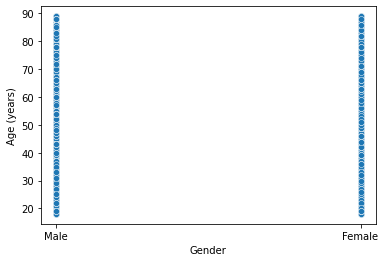

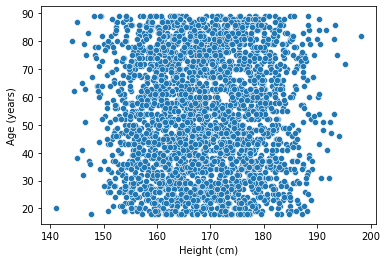

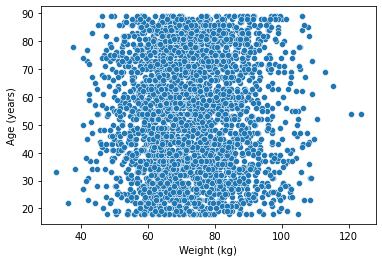

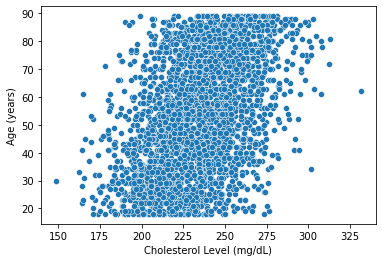

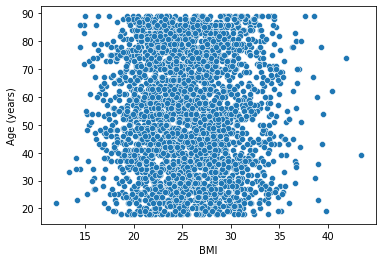

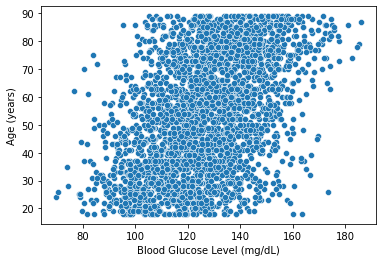

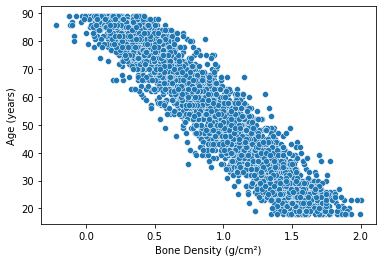

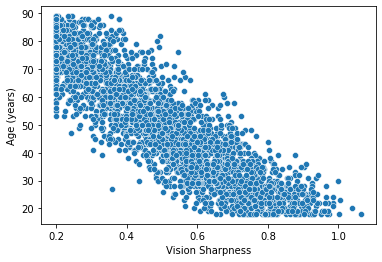

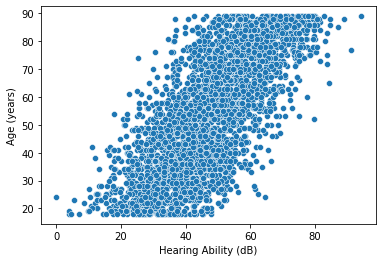

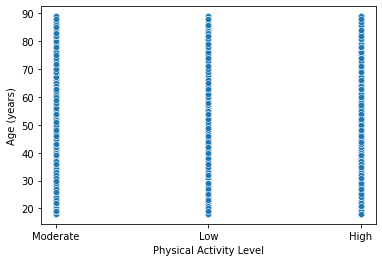

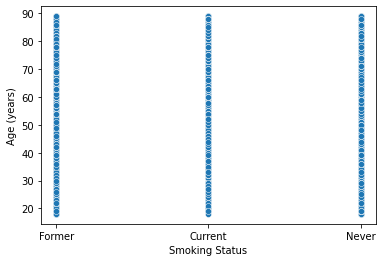

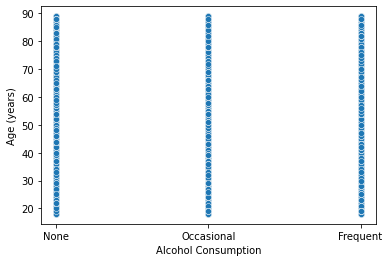

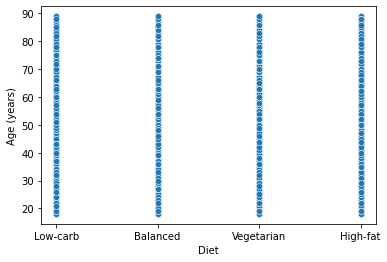

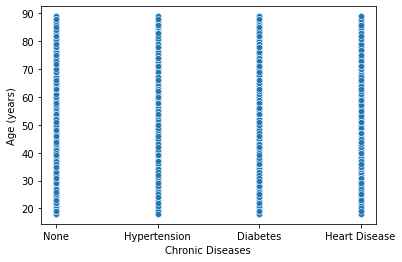

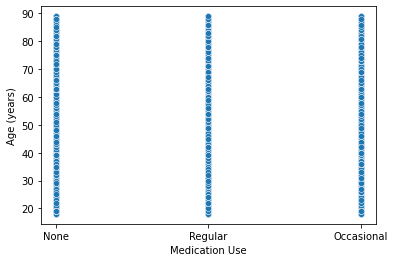

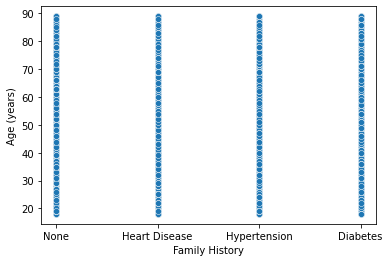

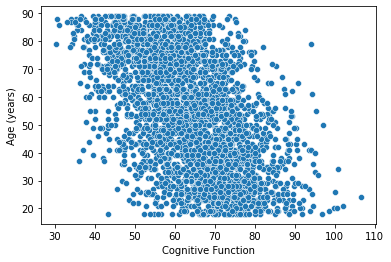

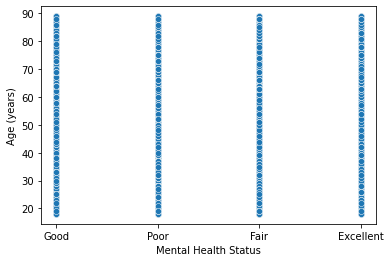

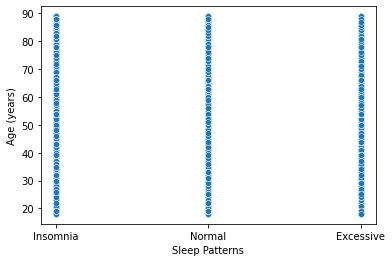

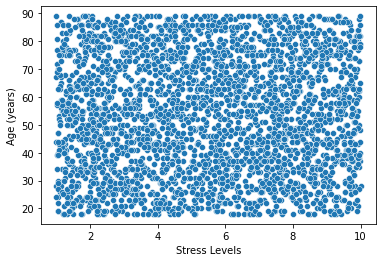

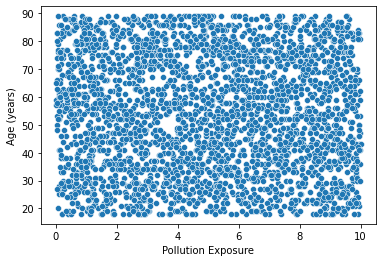

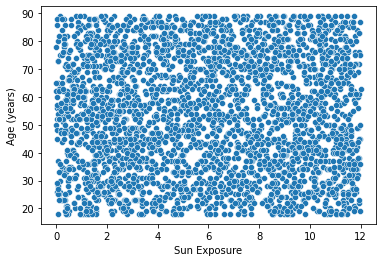

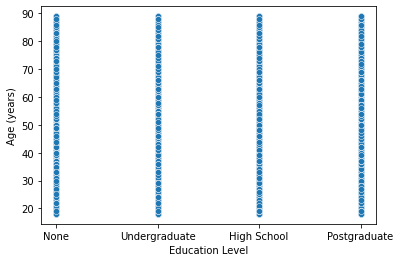

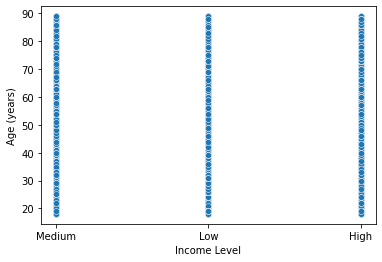

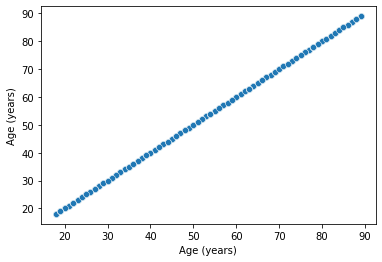

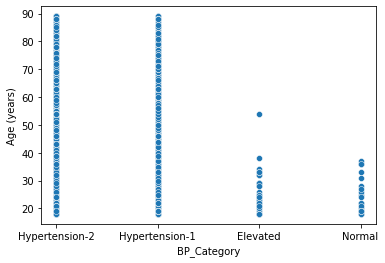

In [13]:
for feature in df.columns:
    sns.scatterplot(data=df, x=feature, y='Age (years)')#, #hue='binary result', palette='RdBu')
    plt.show()

In [14]:
df.columns.values

array(['Gender', 'Height (cm)', 'Weight (kg)',
       'Cholesterol Level (mg/dL)', 'BMI', 'Blood Glucose Level (mg/dL)',
       'Bone Density (g/cm²)', 'Vision Sharpness', 'Hearing Ability (dB)',
       'Physical Activity Level', 'Smoking Status', 'Alcohol Consumption',
       'Diet', 'Chronic Diseases', 'Medication Use', 'Family History',
       'Cognitive Function', 'Mental Health Status', 'Sleep Patterns',
       'Stress Levels', 'Pollution Exposure', 'Sun Exposure',
       'Education Level', 'Income Level', 'Age (years)', 'BP_Category'],
      dtype=object)

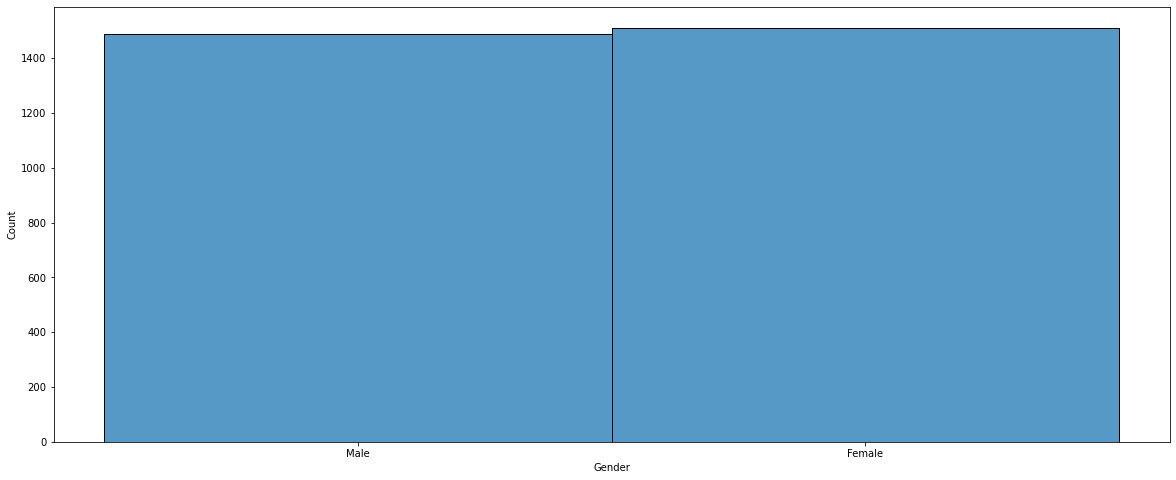

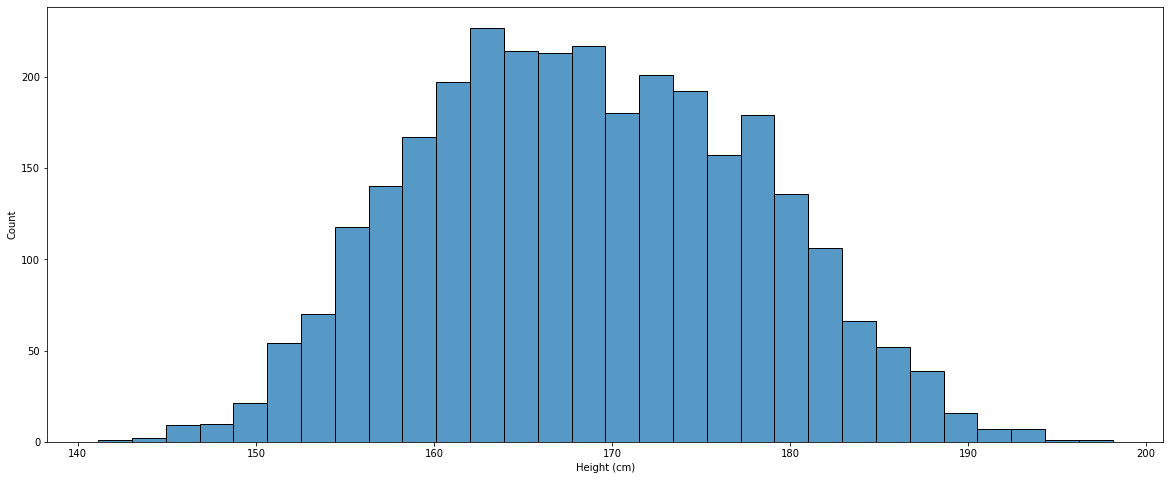

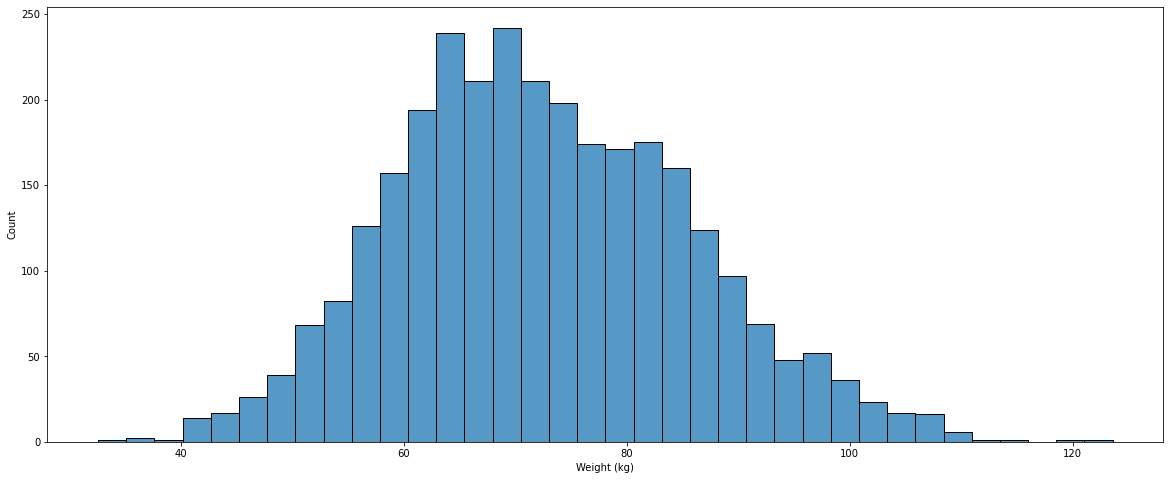

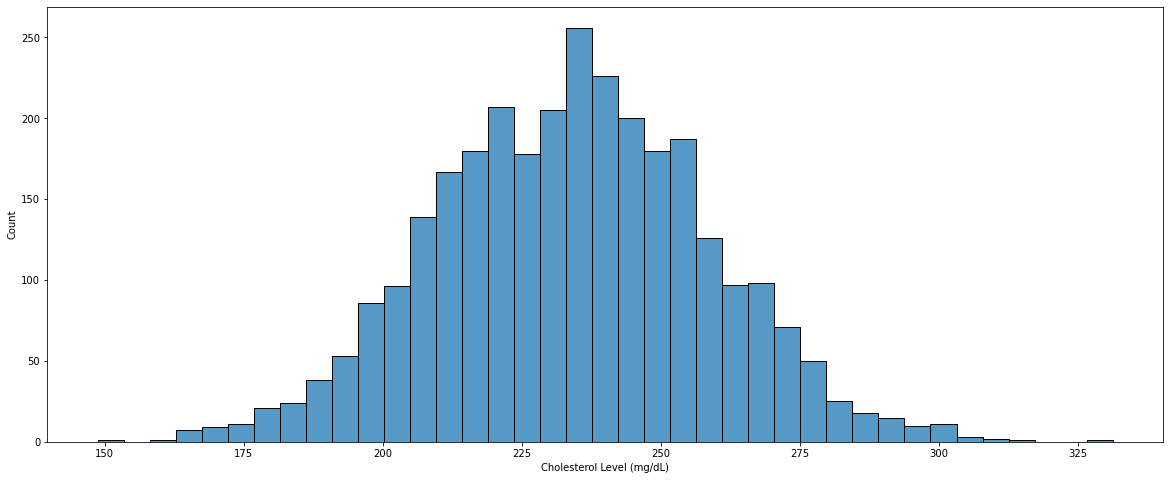

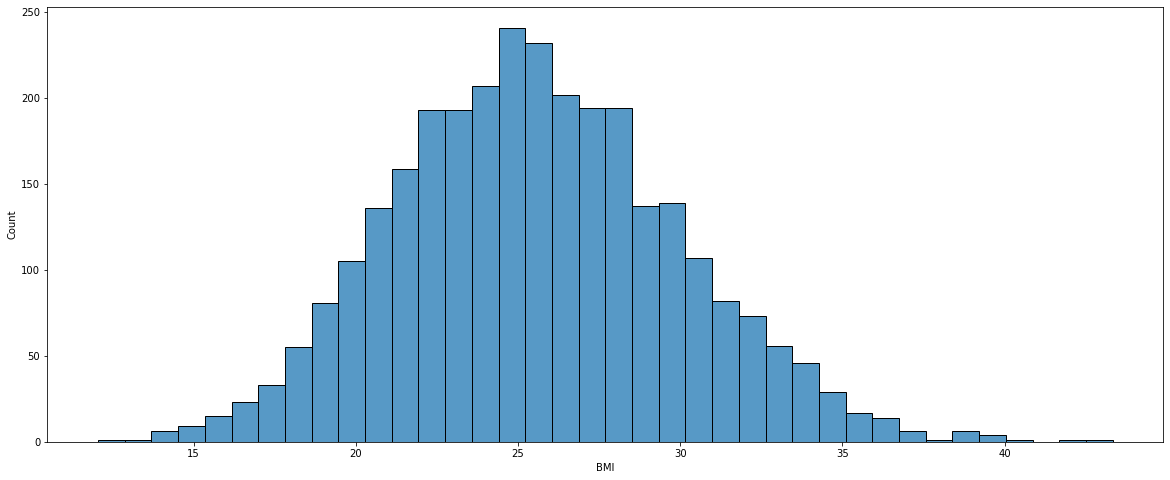

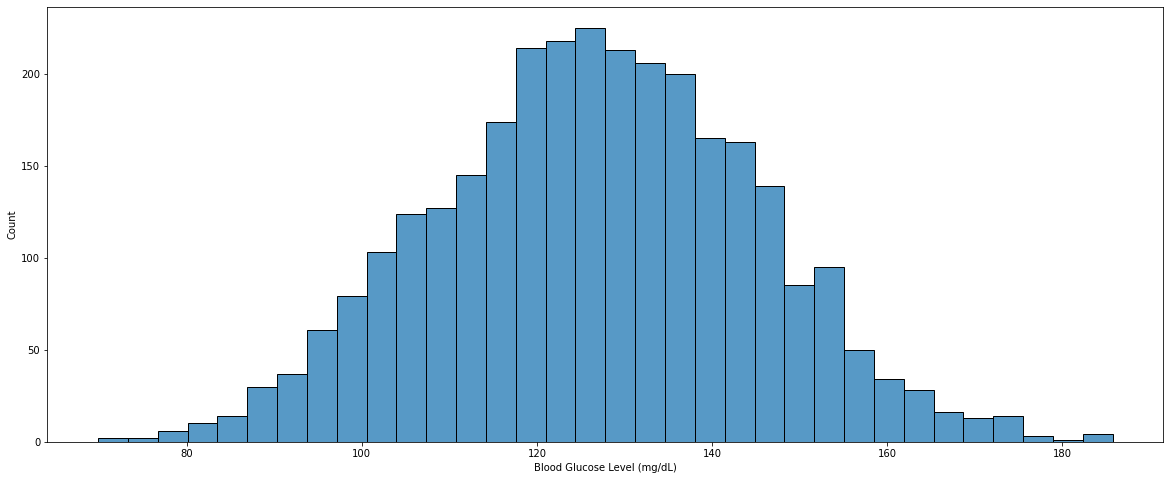

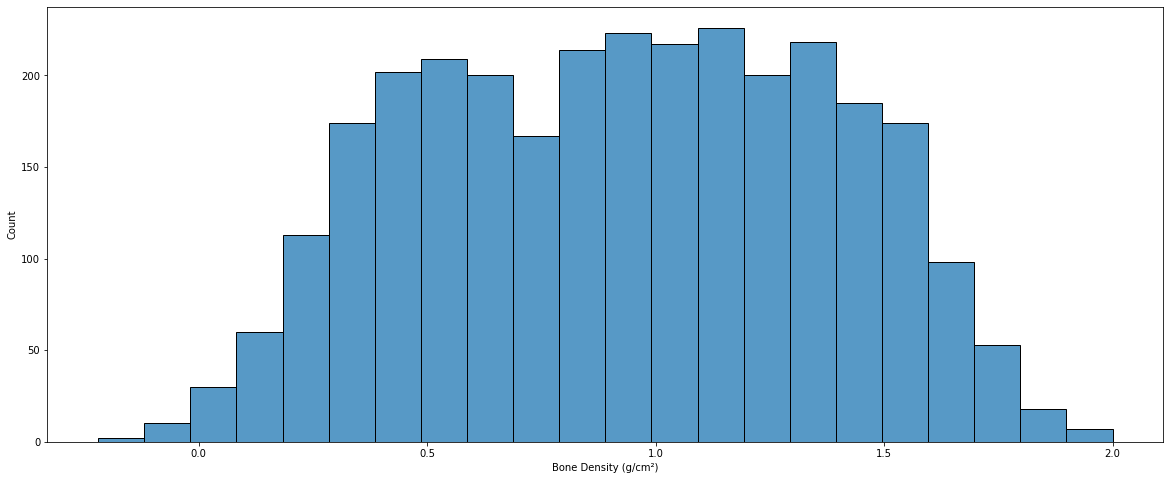

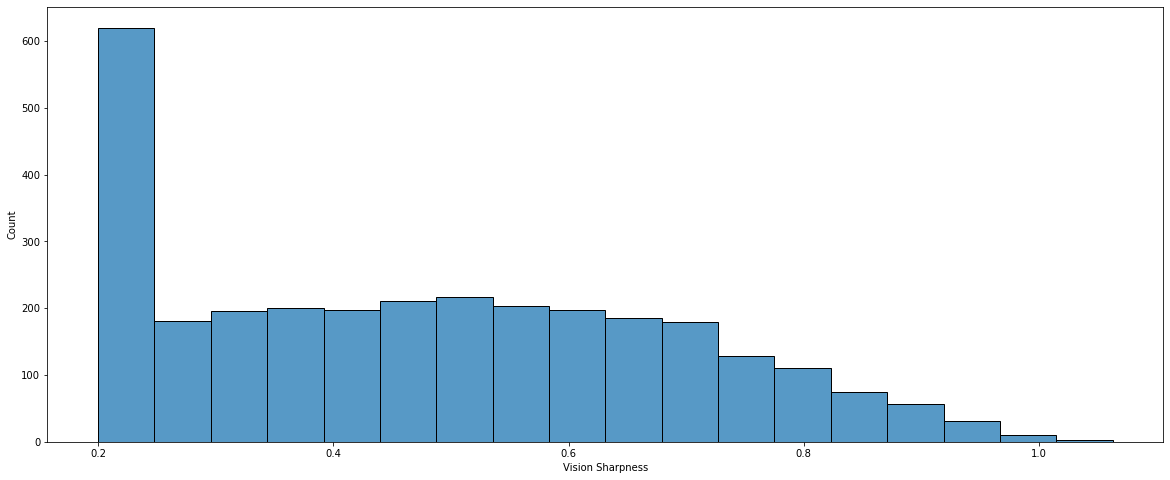

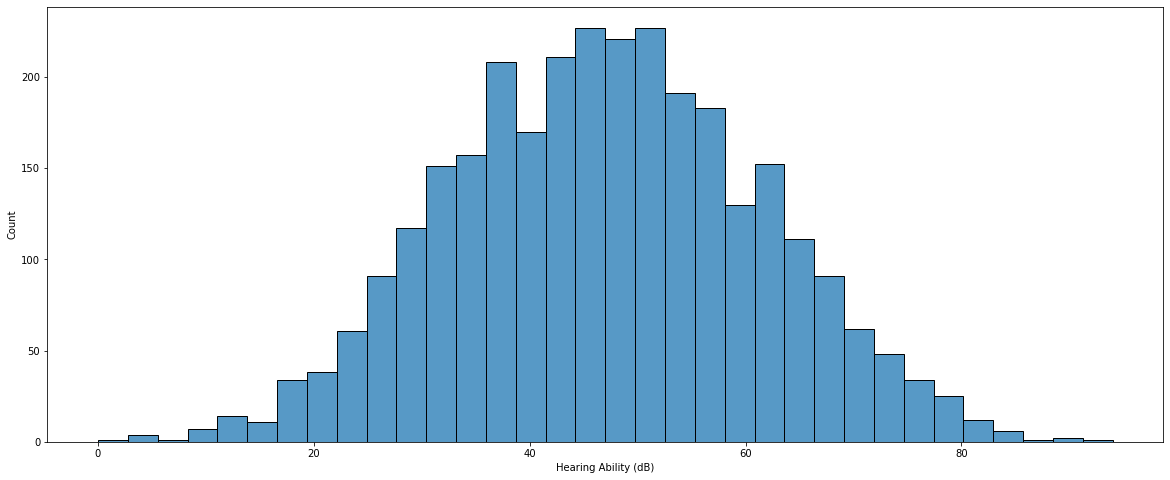

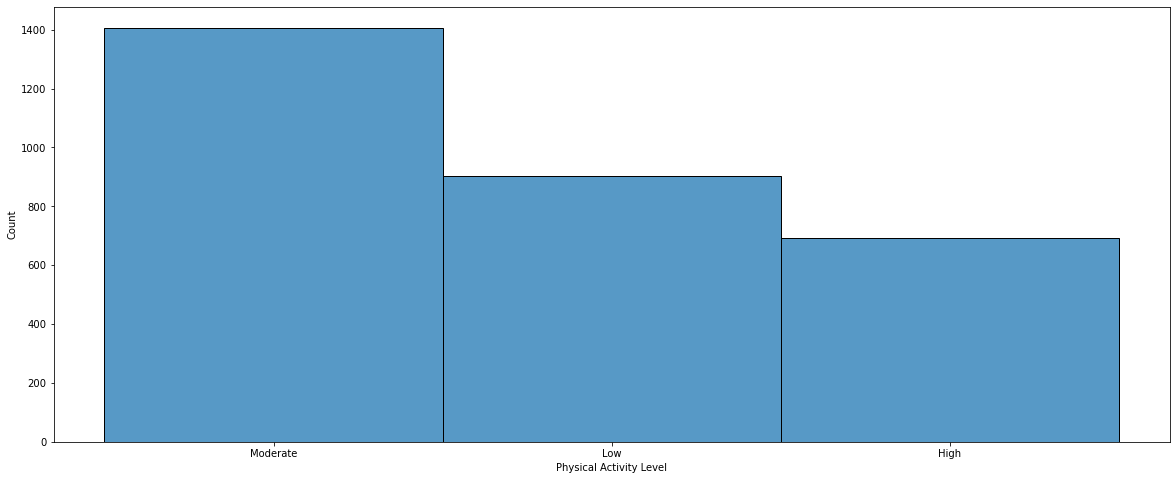

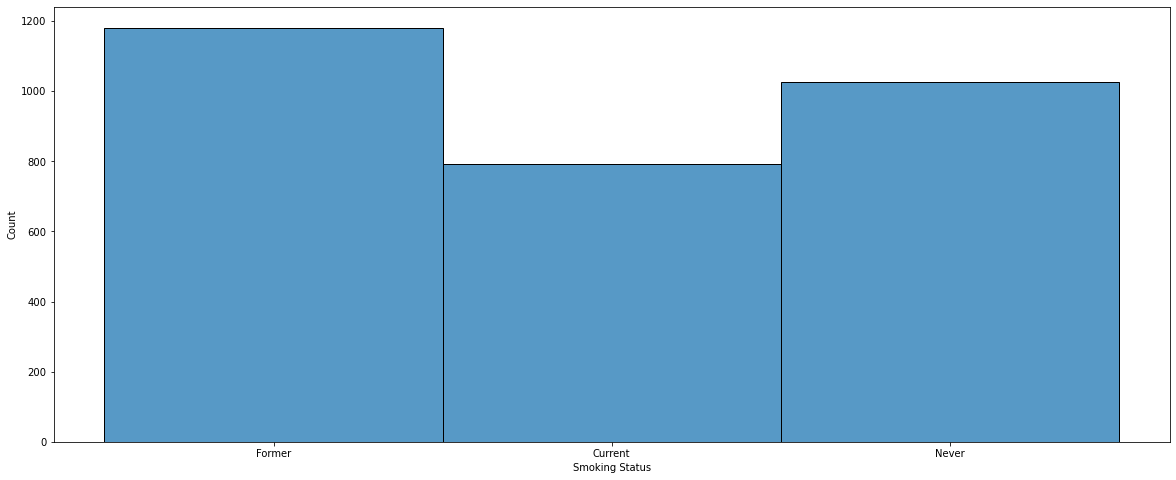

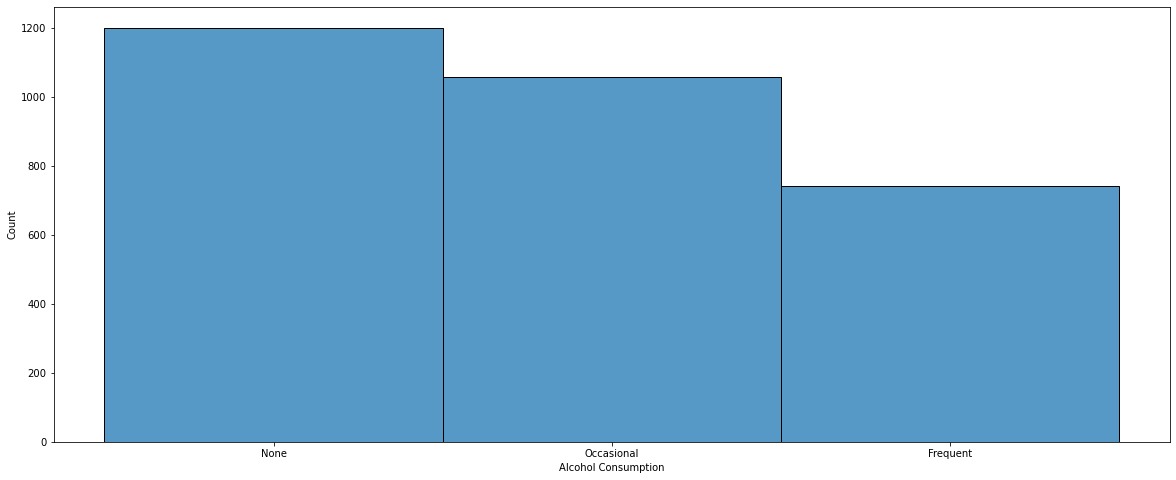

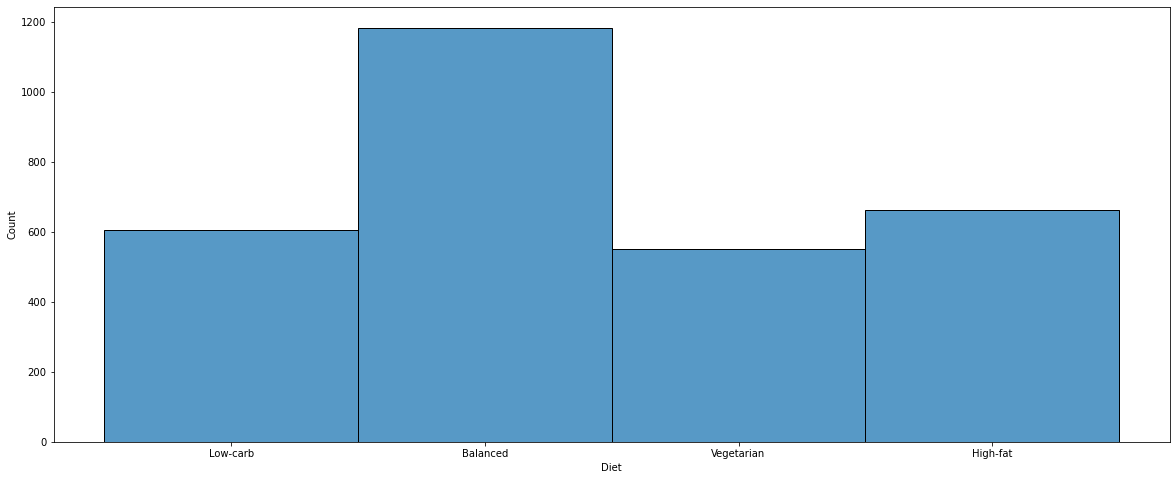

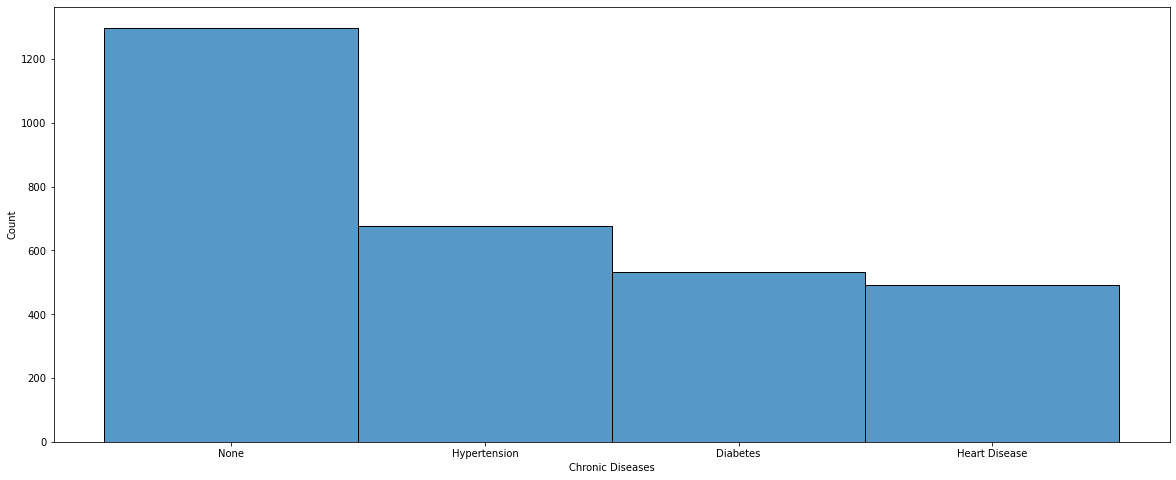

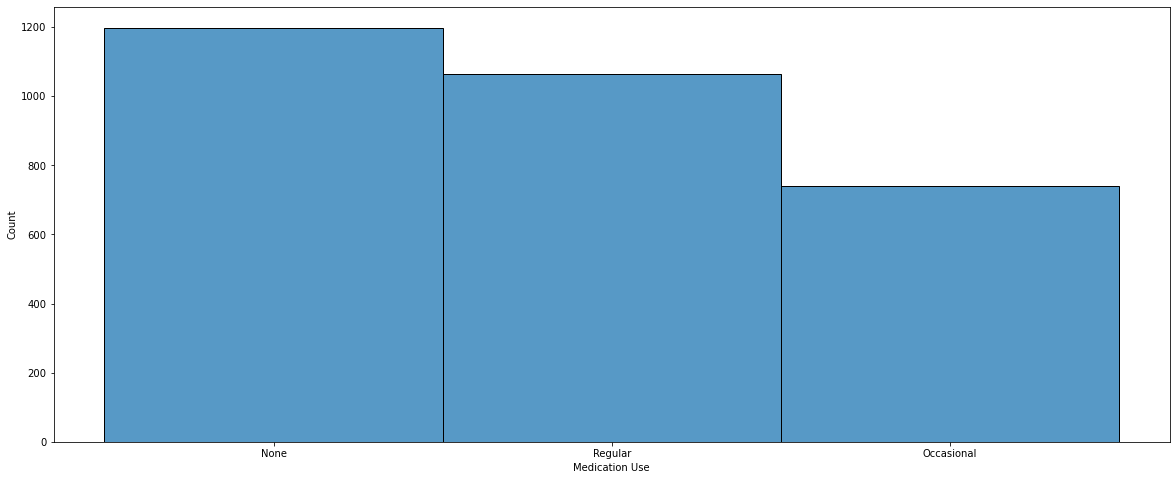

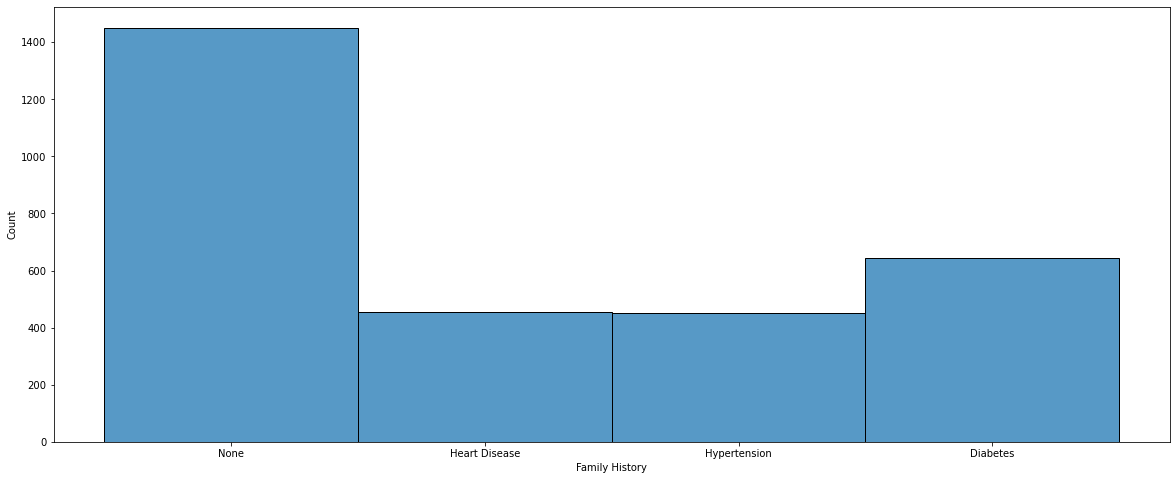

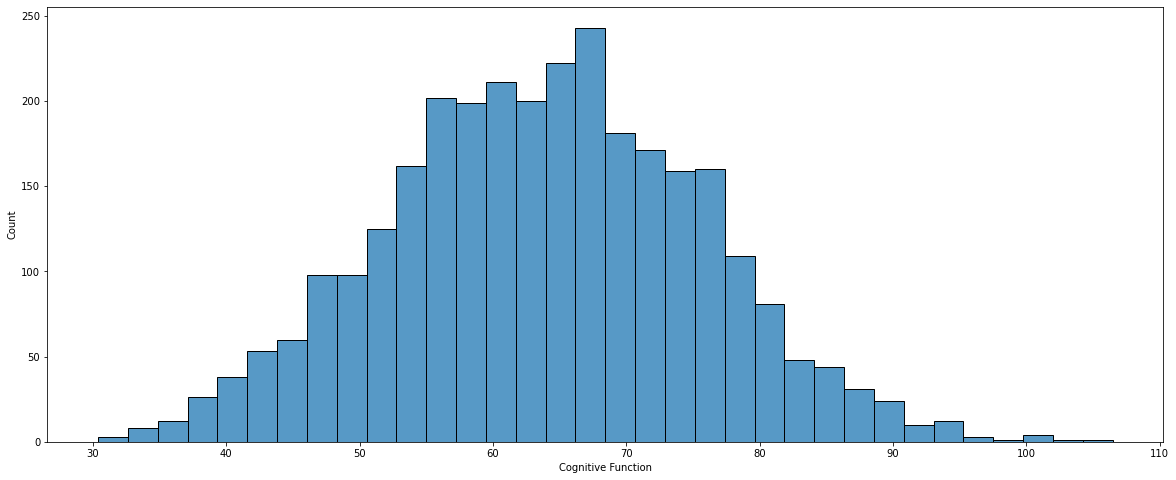

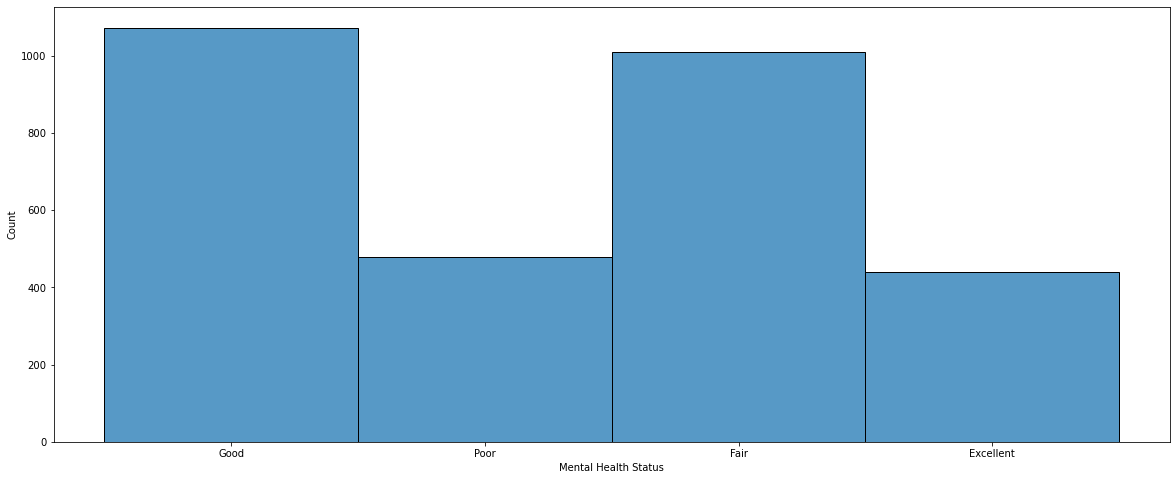

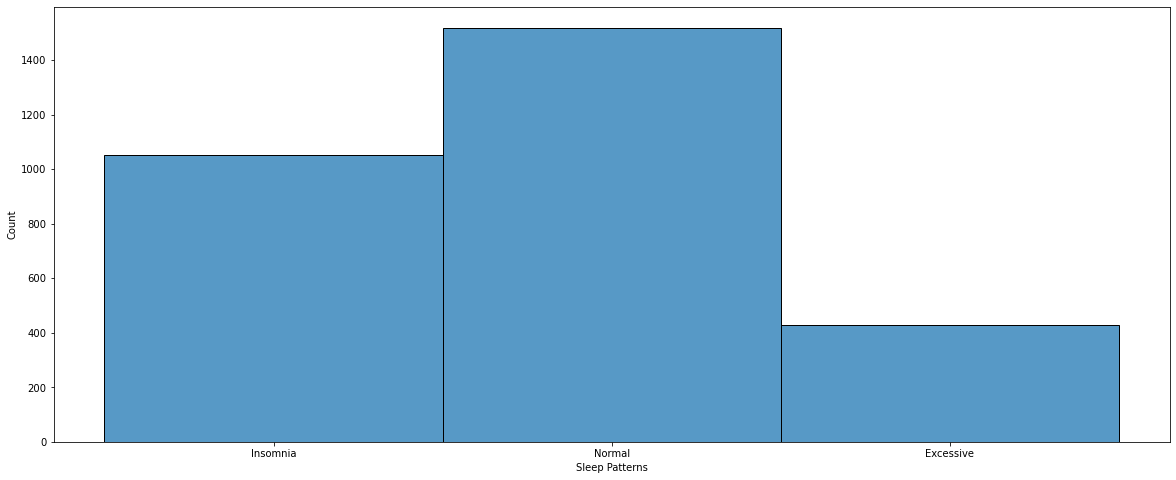

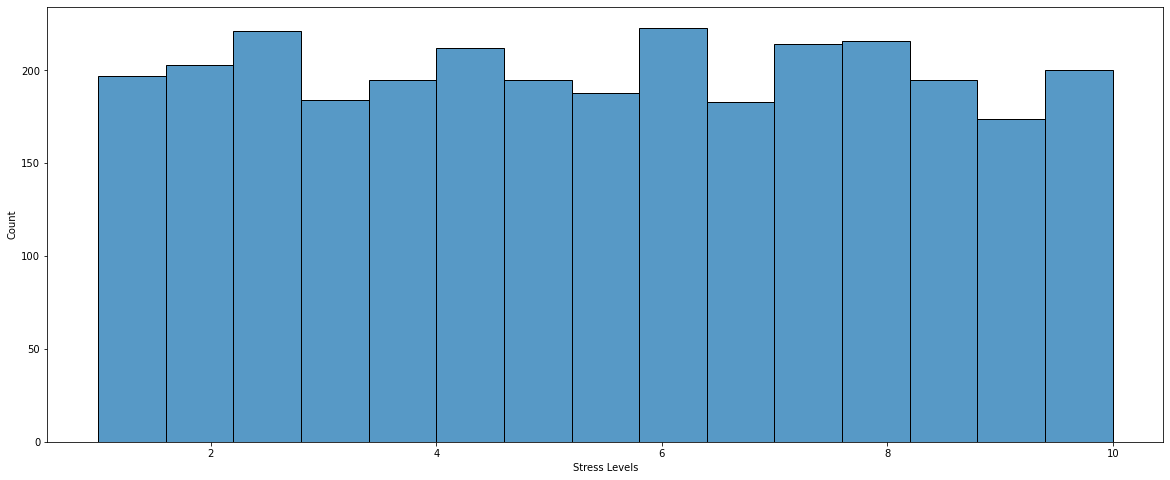

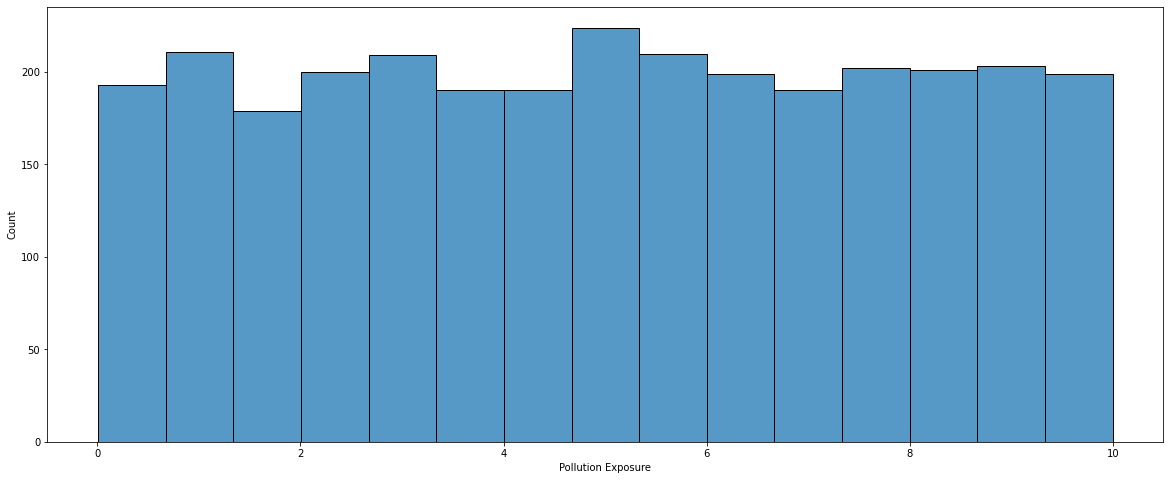

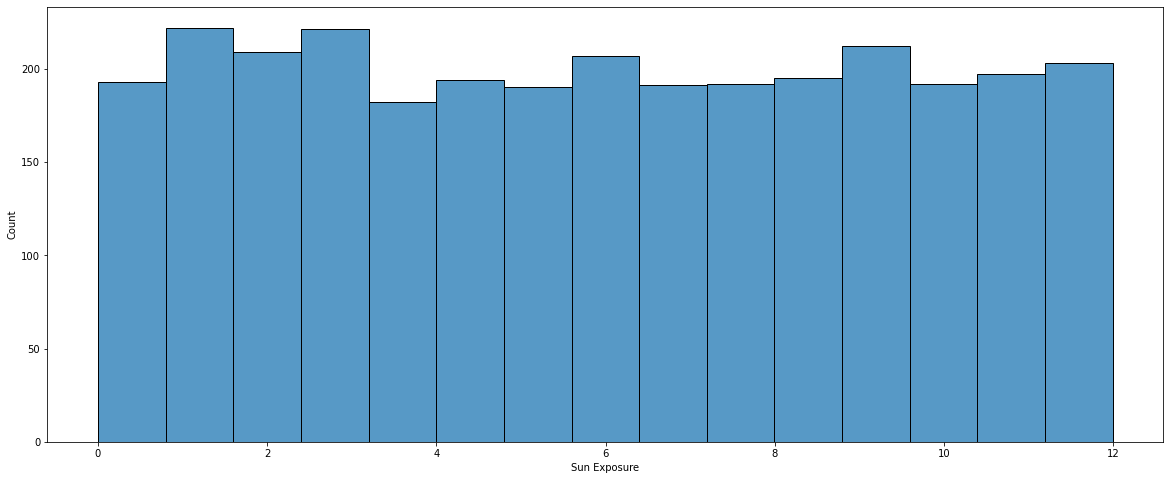

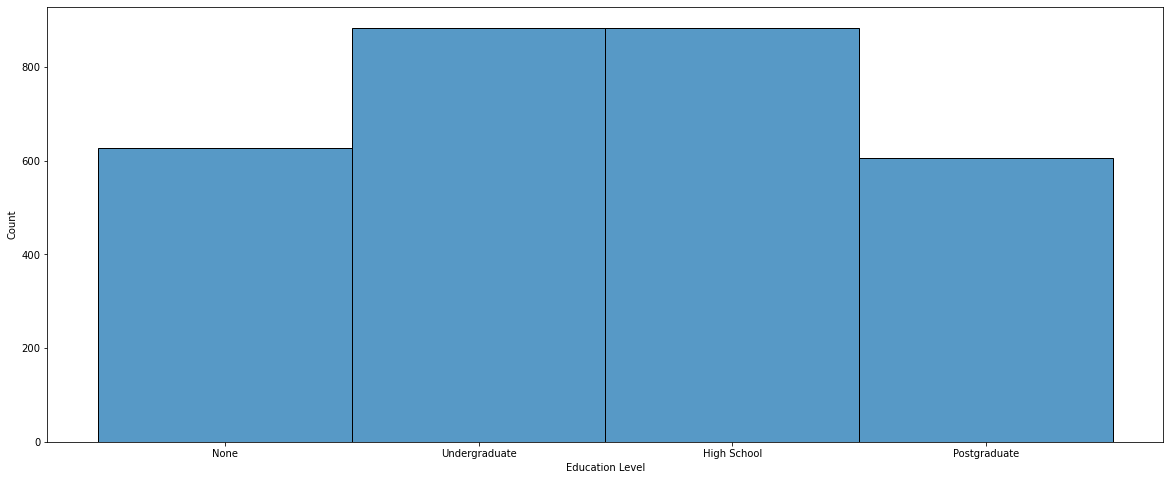

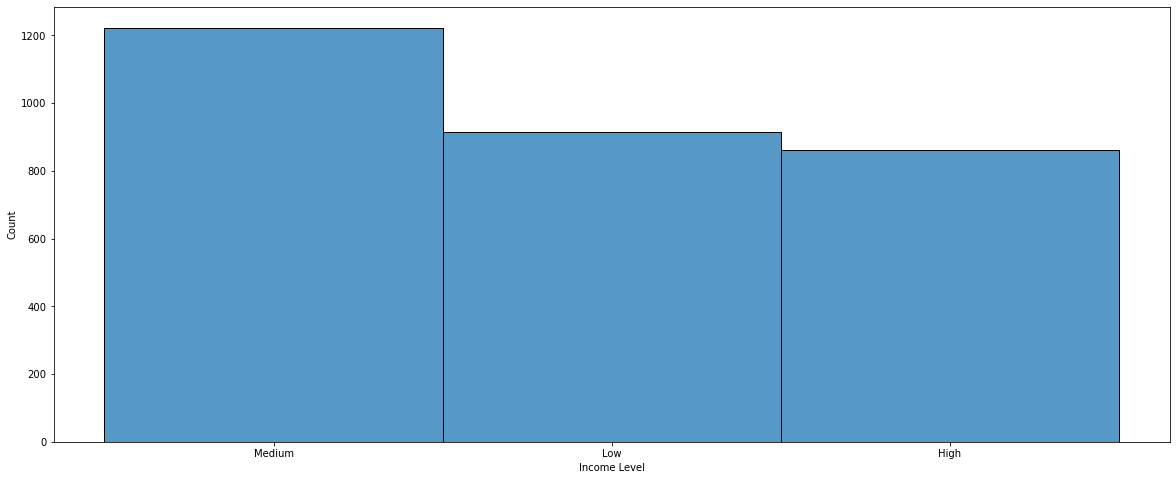

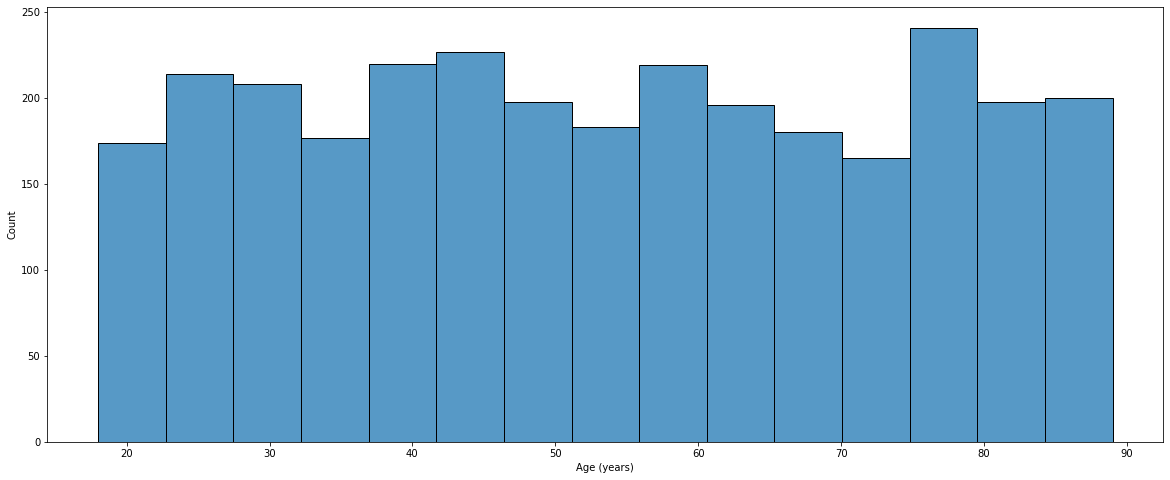

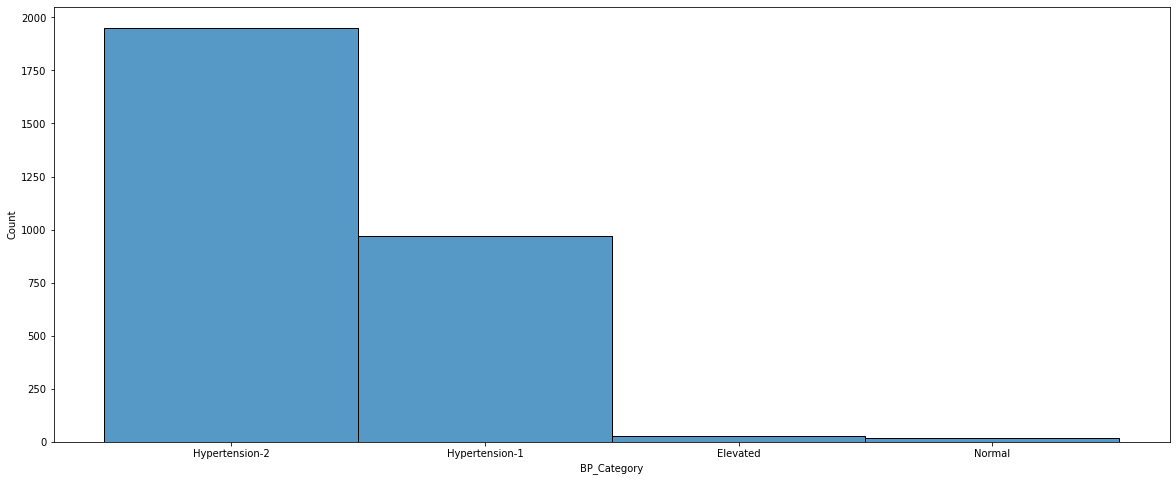

In [15]:
for i in df.columns.values:
    fig, ax = plt.subplots(figsize=(20, 8))
    sns.histplot(data=df, x=df[i])
    plt.show()

In [16]:
df.describe()

,Height (cm),Weight (kg),Cholesterol Level (mg/dL),BMI,Blood Glucose Level (mg/dL),Bone Density (g/cm²),Vision Sharpness,Hearing Ability (dB),Cognitive Function,Stress Levels,Pollution Exposure,Sun Exposure,Age (years)
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,168.590835,72.537260,234.029794,25.550146,126.653909,0.931899,0.474591,47.016214,63.868376,5.476507,5.028982,5.955785,53.485667
std,9.293006,13.190734,24.521436,4.367322,18.226124,0.443550,0.209726,14.336464,11.755738,2.584901,2.871408,3.474595,20.569690
min,141.130985,32.537672,148.811514,12.049900,69.866884,-0.219787,0.200000,0.000000,30.382098,1.000428,0.006395,0.002055,18.000000
25%,161.629515,63.222773,216.756601,22.454115,114.392605,0.561063,0.281671,36.734775,55.647794,3.221745,2.607185,2.873285,36.000000
50%,168.215632,71.448651,234.376822,25.352113,126.802186,0.939585,0.462070,46.963733,64.014652,5.496618,5.095686,5.956789,53.000000
75%,175.522665,81.702801,250.646674,28.403543,139.377079,1.294570,0.639498,56.828847,72.087453,7.680320,7.476338,8.991349,72.000000
max,198.112215,123.598603,331.300589,43.329869,185.736144,1.999829,1.062537,94.003824,106.479831,9.996323,9.998090,11.992504,89.000000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       3000 non-null   object 
 1   Height (cm)                  3000 non-null   float64
 2   Weight (kg)                  3000 non-null   float64
 3   Cholesterol Level (mg/dL)    3000 non-null   float64
 4   BMI                          3000 non-null   float64
 5   Blood Glucose Level (mg/dL)  3000 non-null   float64
 6   Bone Density (g/cm²)         3000 non-null   float64
 7   Vision Sharpness             3000 non-null   float64
 8   Hearing Ability (dB)         3000 non-null   float64
 9   Physical Activity Level      3000 non-null   object 
 10  Smoking Status               3000 non-null   object 
 11  Alcohol Consumption          3000 non-null   object 
 12  Diet                         3000 non-null   object 
 13  Chronic Diseases  

In [18]:
for col in df:
    if df[col].dtype == object:
        print(col, '----------->', df[col].unique())

Gender -----------> ['Male' 'Female']
Physical Activity Level -----------> ['Moderate' 'Low' 'High']
Smoking Status -----------> ['Former' 'Current' 'Never']
Alcohol Consumption -----------> ['None' 'Occasional' 'Frequent']
Diet -----------> ['Low-carb' 'Balanced' 'Vegetarian' 'High-fat']
Chronic Diseases -----------> ['None' 'Hypertension' 'Diabetes' 'Heart Disease']
Medication Use -----------> ['None' 'Regular' 'Occasional']
Family History -----------> ['None' 'Heart Disease' 'Hypertension' 'Diabetes']
Mental Health Status -----------> ['Good' 'Poor' 'Fair' 'Excellent']
Sleep Patterns -----------> ['Insomnia' 'Normal' 'Excessive']
Education Level -----------> ['None' 'Undergraduate' 'High School' 'Postgraduate']
Income Level -----------> ['Medium' 'Low' 'High']
BP_Category -----------> ['Hypertension-2' 'Hypertension-1' None 'Elevated' 'Normal']


In [19]:
df['BP_Category'].value_counts()

Hypertension-2    1951
Hypertension-1     971
Elevated            30
Normal              20
Name: BP_Category, dtype: int64

### Outlier detection and treatment

In [20]:
def find_outliers(df_in, col_name):
    Q1 = df_in[col_name].quantile(0.25)
    Q3 = df_in[col_name].quantile(0.75)
    IQR = Q3-Q1
    fence_low  = Q1-1.5*IQR
    fence_high = Q3+1.5*IQR
    outlier_list=((df_in[col_name] <= fence_low) | (df_in[col_name] >= fence_high)).tolist()
    outlier_indexes=[i for i, x in enumerate(outlier_list) if x]
    return outlier_indexes
#----------------------
bad_indexes=[]
for col in df.columns:
    if df[col].dtype in ["int64", "float64"]:
        outlierindexes= find_outliers(df, col)
        bad_indexes.extend(outlierindexes)
print(f"All Bad indexes: {bad_indexes}")
len(bad_indexes)

All Bad indexes: [2321, 552, 847, 1313, 1744, 1983, 2498, 2599, 199, 389, 422, 521, 621, 850, 874, 1098, 1238, 1424, 1488, 1883, 2035, 2334, 2456, 2543, 2711, 2878, 2970, 157, 168, 218, 1011, 1414, 1544, 1832, 1892, 1983, 2312, 2422, 2498, 2553, 2641, 2743, 2921, 85, 89, 158, 210, 569, 594, 1421, 1623, 1660, 2364, 2425, 2552, 2810, 81, 166, 1180, 1481, 1543, 1849, 2172, 2389, 2856, 257, 343, 921, 1118, 1216, 1348, 1394, 1665, 1931, 2516, 2706]


76

In [21]:
data = df.drop(bad_indexes, axis=0, inplace = False)

In [22]:
data

,Gender,Height (cm),Weight (kg),Cholesterol Level (mg/dL),BMI,Blood Glucose Level (mg/dL),Bone Density (g/cm²),Vision Sharpness,Hearing Ability (dB),Physical Activity Level,...,Cognitive Function,Mental Health Status,Sleep Patterns,Stress Levels,Pollution Exposure,Sun Exposure,Education Level,Income Level,Age (years),BP_Category
0,Male,171.148359,86.185197,259.465814,29.423017,157.652848,0.132868,0.200000,58.786198,Moderate,...,44.059172,Good,Insomnia,2.797064,5.142344,7.108975,None,Medium,89,Hypertension-2
1,Male,172.946206,79.641937,263.630292,26.626847,118.507805,0.629534,0.267312,54.635270,Low,...,45.312298,Good,Normal,9.339930,7.272720,3.918489,Undergraduate,Medium,77,Hypertension-1
2,Female,155.945488,49.167058,207.846206,20.217553,143.587550,0.473487,0.248667,54.564632,Moderate,...,56.246991,Poor,Insomnia,9.234637,8.500386,5.393408,None,Medium,70,Hypertension-2
3,Female,169.078298,56.017921,253.283779,19.595270,137.448581,1.184315,0.513818,79.722963,Moderate,...,55.196092,Poor,Insomnia,4.693446,7.555511,2.745578,None,Low,52,Hypertension-1
4,Female,163.758355,73.966304,236.119899,27.582078,145.328695,0.434562,0.306864,52.479469,Low,...,53.023379,Good,Normal,4.038537,9.429097,3.878435,Undergraduate,High,79,Hypertension-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,Male,161.632502,88.323405,204.175510,33.807917,112.075747,1.583006,0.665907,27.997736,Moderate,...,57.820282,Fair,Normal,8.091897,9.846088,9.111205,Undergraduate,High,22,Hypertension-1
2996,Male,163.443512,93.217007,197.384424,34.894725,101.177692,1.785129,0.720304,32.866623,Low,...,68.783715,Good,Normal,2.427081,1.141303,8.578184,Undergraduate,Medium,19,Normal
2997,Male,177.857644,86.258847,238.641542,27.268332,110.548146,0.366012,0.200000,39.756270,Moderate,...,50.133807,Fair,Normal,7.671837,5.101134,2.199199,Undergraduate,Low,85,Hypertension-2
2998,Female,162.287164,41.371018,198.244328,15.708252,123.704379,1.452963,0.648158,43.338594,Moderate,...,68.864629,Good,Insomnia,7.920076,4.452130,5.051613,None,High,30,Hypertension-1


In [23]:
data.shape

(2926, 26)

In [24]:
df.shape

(3000, 26)

### One Hot Encoding

In [25]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [26]:
ohe = OneHotEncoder()
ct = ColumnTransformer(remainder='passthrough', transformers = [('ohe', ohe, ['Gender', 'Physical Activity Level', 'Smoking Status', 'Alcohol Consumption', 'Diet', 'Chronic Diseases','Medication Use', 'Family History', 'Mental Health Status', 'Sleep Patterns', 'Education Level', 'Income Level', 'BP_Category'])])

In [27]:
ct

ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe', OneHotEncoder(),
                                 ['Gender', 'Physical Activity Level',
                                  'Smoking Status', 'Alcohol Consumption',
                                  'Diet', 'Chronic Diseases', 'Medication Use',
                                  'Family History', 'Mental Health Status',
                                  'Sleep Patterns', 'Education Level',
                                  'Income Level', 'BP_Category'])])

In [28]:
dataset = ct.fit_transform(data)

In [29]:
dataset

array([[ 0.        ,  1.        ,  0.        , ...,  5.14234438,
         7.10897483, 89.        ],
       [ 0.        ,  1.        ,  0.        , ...,  7.27271996,
         3.91848923, 77.        ],
       [ 1.        ,  0.        ,  0.        , ...,  8.50038578,
         5.39340809, 70.        ],
       ...,
       [ 0.        ,  1.        ,  0.        , ...,  5.10113361,
         2.1991993 , 85.        ],
       [ 1.        ,  0.        ,  0.        , ...,  4.45213046,
         5.05161269, 30.        ],
       [ 0.        ,  1.        ,  1.        , ...,  4.62496755,
         3.7451376 , 66.        ]])

In [30]:
dataset = pd.DataFrame(dataset, columns = ct.get_feature_names_out())

In [31]:
dataset

,ohe__Gender_Female,ohe__Gender_Male,ohe__Physical Activity Level_High,ohe__Physical Activity Level_Low,ohe__Physical Activity Level_Moderate,ohe__Smoking Status_Current,ohe__Smoking Status_Former,ohe__Smoking Status_Never,ohe__Alcohol Consumption_Frequent,ohe__Alcohol Consumption_None,...,remainder__BMI,remainder__Blood Glucose Level (mg/dL),remainder__Bone Density (g/cm²),remainder__Vision Sharpness,remainder__Hearing Ability (dB),remainder__Cognitive Function,remainder__Stress Levels,remainder__Pollution Exposure,remainder__Sun Exposure,remainder__Age (years)
0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,29.423017,157.652848,0.132868,0.200000,58.786198,44.059172,2.797064,5.142344,7.108975,89.0
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,26.626847,118.507805,0.629534,0.267312,54.635270,45.312298,9.339930,7.272720,3.918489,77.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,20.217553,143.587550,0.473487,0.248667,54.564632,56.246991,9.234637,8.500386,5.393408,70.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,19.595270,137.448581,1.184315,0.513818,79.722963,55.196092,4.693446,7.555511,2.745578,52.0
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,27.582078,145.328695,0.434562,0.306864,52.479469,53.023379,4.038537,9.429097,3.878435,79.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2921,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,33.807917,112.075747,1.583006,0.665907,27.997736,57.820282,8.091897,9.846088,9.111205,22.0
2922,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,34.894725,101.177692,1.785129,0.720304,32.866623,68.783715,2.427081,1.141303,8.578184,19.0
2923,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,27.268332,110.548146,0.366012,0.200000,39.756270,50.133807,7.671837,5.101134,2.199199,85.0
2924,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,15.708252,123.704379,1.452963,0.648158,43.338594,68.864629,7.920076,4.452130,5.051613,30.0


In [32]:
dataset.dtypes

ohe__Gender_Female                        float64
ohe__Gender_Male                          float64
ohe__Physical Activity Level_High         float64
ohe__Physical Activity Level_Low          float64
ohe__Physical Activity Level_Moderate     float64
ohe__Smoking Status_Current               float64
ohe__Smoking Status_Former                float64
ohe__Smoking Status_Never                 float64
ohe__Alcohol Consumption_Frequent         float64
ohe__Alcohol Consumption_None             float64
ohe__Alcohol Consumption_Occasional       float64
ohe__Diet_Balanced                        float64
ohe__Diet_High-fat                        float64
ohe__Diet_Low-carb                        float64
ohe__Diet_Vegetarian                      float64
ohe__Chronic Diseases_Diabetes            float64
ohe__Chronic Diseases_Heart Disease       float64
ohe__Chronic Diseases_Hypertension        float64
ohe__Chronic Diseases_None                float64
ohe__Medication Use_None                  float64


In [33]:
dataset.describe()

,ohe__Gender_Female,ohe__Gender_Male,ohe__Physical Activity Level_High,ohe__Physical Activity Level_Low,ohe__Physical Activity Level_Moderate,ohe__Smoking Status_Current,ohe__Smoking Status_Former,ohe__Smoking Status_Never,ohe__Alcohol Consumption_Frequent,ohe__Alcohol Consumption_None,...,remainder__BMI,remainder__Blood Glucose Level (mg/dL),remainder__Bone Density (g/cm²),remainder__Vision Sharpness,remainder__Hearing Ability (dB),remainder__Cognitive Function,remainder__Stress Levels,remainder__Pollution Exposure,remainder__Sun Exposure,remainder__Age (years)
count,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,...,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000
mean,0.505810,0.494190,0.230349,0.302119,0.467532,0.265208,0.393370,0.341422,0.246753,0.401572,...,25.487941,126.570855,0.931873,0.474370,46.986445,63.825362,5.482707,5.018764,5.972792,53.509911
std,0.500052,0.500052,0.421128,0.459255,0.499030,0.441520,0.488581,0.474268,0.431196,0.490300,...,4.243240,17.875166,0.441252,0.208323,14.129641,11.574522,2.580915,2.875043,3.471328,20.437549
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,14.045852,78.497078,-0.219787,0.200000,7.104116,31.200120,1.000428,0.006395,0.002055,18.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,22.454646,114.552612,0.564302,0.283485,36.805800,55.705993,3.225109,2.598040,2.893190,36.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,25.340178,126.815957,0.937934,0.462301,46.928165,64.036728,5.514982,5.095686,5.992984,53.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,28.347433,139.156899,1.289974,0.638252,56.590072,72.036521,7.680110,7.453946,9.028740,72.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,37.195505,175.508289,1.999829,1.062537,84.650004,95.755168,9.996323,9.998090,11.992504,89.000000


### Splitting dependent and independent variables

In [34]:
X = dataset.drop("remainder__Age (years)", axis = 1)
print(X.shape)

y = dataset["remainder__Age (years)"]
print(y.shape)

(2926, 57)
(2926,)


### Splitting the dataset into train set and test set

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

### Scaling

In [36]:
from sklearn.preprocessing import StandardScaler

std_scle = StandardScaler()

std_scle.fit_transform(X_train)

X_train_scaled = pd.DataFrame(std_scle.fit_transform(X_train))

In [37]:
X_train_scaled.describe()

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
count,2.340000e+03,2.340000e+03,2.340000e+03,2.340000e+03,2.340000e+03,2.340000e+03,2.340000e+03,2.340000e+03,2.340000e+03,2.340000e+03,...,2.340000e+03,2.340000e+03,2.340000e+03,2.340000e+03,2.340000e+03,2.340000e+03,2.340000e+03,2.340000e+03,2.340000e+03,2.340000e+03
mean,-3.786145e-17,7.183238e-17,-2.503695e-16,-3.795634e-18,-1.837087e-16,1.800080e-16,3.672276e-17,-1.224092e-16,1.887379e-16,2.271213e-16,...,-8.536097e-15,2.440664e-15,-9.988259e-15,-1.850372e-15,-1.106176e-14,9.663875e-15,1.386059e-15,-1.300100e-15,-5.240585e-15,-7.476688e-16
std,1.000214e+00,1.000214e+00,1.000214e+00,1.000214e+00,1.000214e+00,1.000214e+00,1.000214e+00,1.000214e+00,1.000214e+00,1.000214e+00,...,1.000214e+00,1.000214e+00,1.000214e+00,1.000214e+00,1.000214e+00,1.000214e+00,1.000214e+00,1.000214e+00,1.000214e+00,1.000214e+00
min,-1.016373e+00,-9.838904e-01,-5.490410e-01,-6.579859e-01,-9.346116e-01,-5.990701e-01,-8.034735e-01,-7.234898e-01,-5.701125e-01,-8.245167e-01,...,-2.870043e+00,-2.714604e+00,-2.707527e+00,-2.424915e+00,-1.323913e+00,-2.727771e+00,-2.775642e+00,-1.743348e+00,-1.760121e+00,-1.733826e+00
25%,-1.016373e+00,-9.838904e-01,-5.490410e-01,-6.579859e-01,-9.346116e-01,-5.990701e-01,-8.034735e-01,-7.234898e-01,-5.701125e-01,-8.245167e-01,...,-7.227092e-01,-7.051018e-01,-6.636428e-01,-8.277960e-01,-9.094901e-01,-7.249408e-01,-6.923155e-01,-8.756834e-01,-8.418834e-01,-8.844716e-01
50%,9.838904e-01,-9.838904e-01,-5.490410e-01,-6.579859e-01,-9.346116e-01,-5.990701e-01,-8.034735e-01,-7.234898e-01,-5.701125e-01,-8.245167e-01,...,2.320259e-02,-2.870832e-02,1.424804e-02,1.704877e-02,-5.840952e-02,-1.558298e-02,6.812734e-03,3.623940e-02,2.725034e-02,1.141855e-02
75%,9.838904e-01,1.016373e+00,-5.490410e-01,1.519789e+00,1.069963e+00,1.669254e+00,1.244596e+00,1.382189e+00,-5.701125e-01,1.212832e+00,...,7.005722e-01,6.665075e-01,7.188680e-01,8.007721e-01,7.798063e-01,6.839784e-01,7.228666e-01,8.441372e-01,8.446517e-01,8.918616e-01
max,9.838904e-01,1.016373e+00,1.821358e+00,1.519789e+00,1.069963e+00,1.669254e+00,1.244596e+00,1.382189e+00,1.754040e+00,1.212832e+00,...,2.866504e+00,2.734347e+00,2.739859e+00,2.430608e+00,2.564417e+00,2.689868e+00,2.735603e+00,1.745298e+00,1.740345e+00,1.714738e+00


In [38]:
X_test_scaled = pd.DataFrame(std_scle.transform(X_test))

In [39]:
X_test_scaled

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,0.983890,-0.983890,1.821358,-0.657986,-0.934612,-0.599070,-0.803473,1.382189,-0.570113,-0.824517,...,-0.584222,-0.453065,-1.241389,-0.667402,-0.426693,0.418553,-0.171985,-0.331733,-1.578564,0.433202
1,-1.016373,1.016373,1.821358,-0.657986,-0.934612,1.669254,-0.803473,-0.723490,-0.570113,-0.824517,...,0.286332,0.994735,0.447602,-0.686626,-1.323913,1.167087,-1.219057,-0.515195,-0.199333,0.583612
2,0.983890,-0.983890,-0.549041,1.519789,-0.934612,-0.599070,-0.803473,1.382189,-0.570113,1.212832,...,0.284856,1.985909,-1.499009,-0.081505,0.429623,0.098848,0.315220,-0.646399,-1.085814,0.217584
3,0.983890,-0.983890,-0.549041,1.519789,-0.934612,-0.599070,1.244596,-0.723490,1.754040,-0.824517,...,0.605531,-0.528897,-0.332854,0.269283,0.219293,0.054996,0.914608,1.520563,1.556563,0.423614
4,0.983890,-0.983890,-0.549041,-0.657986,1.069963,-0.599070,1.244596,-0.723490,-0.570113,-0.824517,...,-0.264853,-1.892593,-0.904977,-1.049275,-0.911032,1.262754,-0.354743,-0.705361,-0.033649,-0.996693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,-1.016373,1.016373,-0.549041,1.519789,-0.934612,-0.599070,-0.803473,1.382189,-0.570113,-0.824517,...,0.310607,1.113191,0.960950,-0.745336,-1.279220,0.154359,-0.890431,0.200505,-1.618743,0.524329
582,0.983890,-0.983890,-0.549041,-0.657986,1.069963,1.669254,-0.803473,-0.723490,-0.570113,1.212832,...,0.495908,0.089201,1.127113,-1.978778,-0.907076,0.383246,-0.607411,-1.738472,0.179889,-0.139759
583,-1.016373,1.016373,1.821358,-0.657986,-0.934612,-0.599070,1.244596,-0.723490,-0.570113,1.212832,...,1.165178,-0.263089,-0.743548,0.380867,-0.575575,0.420186,0.076676,-1.011717,1.589155,1.418287
584,0.983890,-0.983890,1.821358,-0.657986,-0.934612,-0.599070,-0.803473,1.382189,-0.570113,1.212832,...,-1.160711,-0.701592,-1.554271,1.255051,1.825688,-2.448905,1.034528,0.489198,1.572178,1.656010


### Model Building

####               Linear Regression

In [40]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

y_pred = lin_reg.predict(X_test_scaled)


from sklearn.metrics  import mean_squared_error, mean_absolute_error, r2_score 

mse = mean_squared_error(y_test, y_pred) 

print(mse)

mae = mean_absolute_error(y_test, y_pred) 

print(mae)

r2 =  r2_score(y_test, y_pred)

print(r2)

30.49858965614107
4.453920525996457
0.9300943309355081


#### Support Vector Machine (SVM) for Regression

In [41]:
from sklearn.svm import SVR

svm_reg = SVR(kernel = 'linear')

svm_reg.fit(X_train_scaled, y_train)

y_pred_svm = svm_reg.predict(X_test_scaled)


mse_svm = mean_squared_error(y_test, y_pred_svm) 

print(mse_svm)

mae_svm = mean_absolute_error(y_test, y_pred_svm) 

print(mae_svm)

30.450727368941802
4.448734022993146


In [42]:
svm_reg_nl = SVR(kernel = 'rbf')

svm_reg_nl.fit(X_train_scaled, y_train)

y_pred_reg_nl = svm_reg_nl.predict(X_test_scaled)

mae_svm_nl = mean_absolute_error(y_test, y_pred_reg_nl)

mae_svm_nl

6.36100749220318

In [43]:
svm_poly = SVR(kernel = 'poly', degree = 3)

svm_poly.fit(X_train_scaled, y_train)

y_pred_poly = svm_poly.predict(X_test_scaled)

mae_poly = mean_absolute_error(y_test, y_pred_poly)

mae_poly

10.493208934053916

#### Decision Tree for Regression


In [45]:
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor(criterion='squared_error')

dt_reg.fit(X_train, y_train)

y_pred_dt = dt_reg.predict(X_test)

mse_dt = mean_squared_error(y_test, y_pred_dt)

print(mse_dt)

mae_dt = mean_absolute_error(y_test, y_pred_dt)

print(mae_dt)

67.05290102389078
6.284982935153583


### Hyperparameter tuning for SVM Model

In [48]:
param_grid = {'C': [0.1, 1, 10, 100, 1000, 10000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 0.00001], 
              'kernel': ['rbf']} 

grid_search_cls =  GridSearchCV(estimator = svm_reg_nl, param_grid = param_grid, 
                                refit = True, verbose = 3, n_jobs = -1, cv = 5, scoring = 'neg_mean_absolute_error')

grid_search_cls.fit(X_train_scaled, y_train)

print(f"Best Hyperparameters: {grid_search_cls.best_params_}")

print(f"Best Score: {grid_search_cls.best_score_}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Hyperparameters: {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
Best Score: -4.438220190475834


In [49]:
param_grid = {'C': [1000],  
              'gamma': [0.0001], 
              'kernel': ['rbf']} 

grid_search_reg =  GridSearchCV(estimator = svm_reg_nl, param_grid = param_grid, 
                                refit = True, verbose = 3, n_jobs = -1, cv = 5, scoring = 'r2')

grid_search_reg.fit(X_train_scaled, y_train)

print(f"Best Hyperparameters: {grid_search_reg.best_params_}")

print(f"Best Score: {grid_search_reg.best_score_}")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Hyperparameters: {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
Best Score: 0.9253651689688059
